In [109]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

cpu_file = './Data/cpu.json'
with open(cpu_file) as filename:
    dict_cpu = json.load(filename)

pd_cpu = pd.DataFrame(dict_cpu)
print(pd_cpu)

                      name  rating  rating_count  price_usd core_count  \
0         AMD Ryzen 5 3600       4          1025     245.99          6   
1        AMD Ryzen 5 5600X       4           266     299.00          6   
2        AMD Ryzen 7 3700X       4           565     286.00          8   
3        AMD Ryzen 7 5800X       4           146     399.99          8   
4     Intel Core i7-10700K       4            80     319.99          8   
...                    ...     ...           ...        ...        ...   
1295      AMD Ryzen 5 3500       5             1        NaN          6   
1296          AMD A10-9700       0             0     119.99          4   
1297    Intel Core i5-9400       4            12     234.10          6   
1298   Intel Core i5-3570K       4           462     136.50          4   
1299     AMD Ryzen 7 1700X       4            91     453.46          8   

     core_clock boost_clock    tdp     integrated_graphics    smt  
0       3.6 GHz     4.2 GHz   65 W         

In [110]:
pd_cpu = pd_cpu[pd_cpu['boost_clock'].notna()]
pd_cpu = pd_cpu[pd_cpu['price_usd'].notna()]
pd_cpu.reset_index(inplace=True)

In [111]:
print(pd_cpu.loc[:, 'core_clock':'boost_clock'])

     core_clock boost_clock
0       3.6 GHz     4.2 GHz
1       3.7 GHz     4.6 GHz
2       3.6 GHz     4.4 GHz
3       3.8 GHz     4.7 GHz
4       3.8 GHz     5.1 GHz
...         ...         ...
1048    3.5 GHz     3.9 GHz
1049      3 GHz     3.7 GHz
1050    3.5 GHz     3.8 GHz
1051    2.9 GHz     4.1 GHz
1052    3.4 GHz     3.8 GHz

[1053 rows x 2 columns]


In [112]:
def magic_float(string):
    return float(re.findall(r'(\d{1}\.*\d*) \w', string)[0])

In [113]:
for i in pd_cpu.index:
    pd_cpu.at[i, 'core_clock'] = magic_float(pd_cpu.at[i, 'core_clock'])
    pd_cpu.at[i, 'boost_clock'] = magic_float(pd_cpu.at[i, 'boost_clock'])
    pd_cpu.at[i, 'tdp'] = magic_float(pd_cpu.at[i, 'tdp'])

<AxesSubplot:>

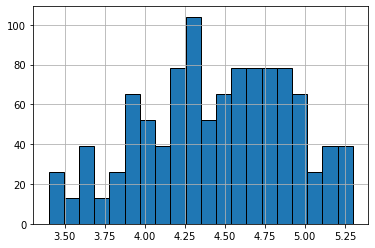

In [114]:
pd_cpu['boost_clock'].hist(bins=20, edgecolor='k')

In [115]:
labels = []
for i in pd_cpu.index:
    value = pd_cpu.loc[i, "boost_clock"]
    if value >= 4.3:
        labels.append('high')
    elif (value >= 3.8) and (value < 4.3):
        labels.append('medium')
    else:
        labels.append('light')
pd_cpu.insert (1, "perf", labels)
print(pd_cpu)

      index    perf                  name  rating  rating_count  price_usd  \
0         0  medium      AMD Ryzen 5 3600       4          1025     245.99   
1         1    high     AMD Ryzen 5 5600X       4           266     299.00   
2         2    high     AMD Ryzen 7 3700X       4           565     286.00   
3         3    high     AMD Ryzen 7 5800X       4           146     399.99   
4         4    high  Intel Core i7-10700K       4            80     319.99   
...     ...     ...                   ...     ...           ...        ...   
1048   1291  medium   Intel Core i7-4770K       4           467     300.00   
1049   1293   light      AMD Ryzen 7 1700       4           172     385.00   
1050   1296  medium          AMD A10-9700       0             0     119.99   
1051   1297  medium    Intel Core i5-9400       4            12     234.10   
1052   1299  medium     AMD Ryzen 7 1700X       4            91     453.46   

     core_count core_clock boost_clock    tdp     integrated_gr

In [117]:
for i in pd_cpu.index:
    name = pd_cpu.loc[i, "name"]
    perf = pd_cpu.loc[i, "perf"]
    os_name = str(['windows', 'linux'])
    tdp = pd_cpu.loc[i, "tdp"]
    cpu_str = 'cpu(\'%s\', perf(%s), os(%s), tdp(%d))' % (name, perf, os_name, tdp)
    print(cpu_str)
    break

cpu('AMD Ryzen 5 3600', perf(medium), os(['windows', 'linux']), tdp(65))
